# Import Libraries

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set UP our Data Frame We Will be Using

In [315]:
df_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')


# Begin Cleaning of Data

In [316]:
df_movie_info['box_office'] = df_movie_info['box_office'].str.replace(',','').astype(float) # Set box office column as floats to perform mathematical operations on

In [317]:
df_movie_info = df_movie_info.dropna(subset=['box_office']) #Drop NA box office values
df_dropped_na = df_movie_info.dropna(subset=['box_office']) #Drop NA box office values and create new Data frame
df_dropped_na = df_dropped_na[df_dropped_na.rating != 'NR'] #Drop NR rows as they are of no use to us

# Percent of Films with Parental Rating and Box Office Info

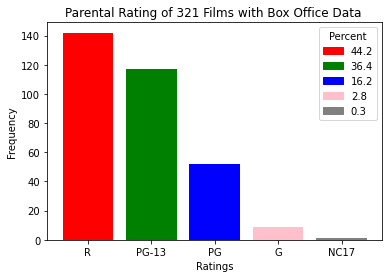

In [318]:
# Make our figure and set our x and y axis
fig , ax = plt.subplots()

x = list(df_dropped_na.value_counts('rating').index)
height = list(df_dropped_na.value_counts('rating'))

#Different colors for easier visualizaion
color = ['red','green','blue','pink', 'grey', 'black']

ax.bar(x = x ,height = height,color=color)

ax.set_title('Parental Rating of 321 Films with Box Office Data ')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')

#This creates our custom legend so we can find percent of our ratings

colors = {round((height[val]/len(df_dropped_na))*100,1) : color[val] for val in range(0,len(height))}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent');

This shows the total distribution of ratings amongst the dataset, with the R category coming in first place. 

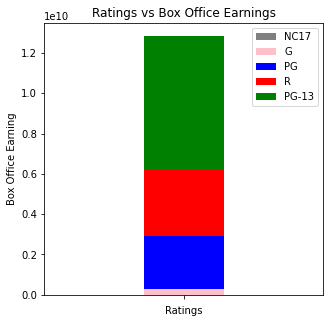

In [319]:
# Group our ratings and their total earnings
df_grouped = df_dropped_na.groupby('rating').sum()

# Get total of all box office earnings
df_total = df_grouped['box_office'].sum()

# Drop id column as it will not be used
df_grouped = df_grouped.drop('id',axis=1)

# Make numbers and ratings into list for easier manipulation
y = [x[0] for x in df_grouped.values]
x = df_grouped.index

# Turn into sorted dictionary to prepare for graph
d = {x[val] : y[val] for val in range(0,len(x))}
d_sort =pd.DataFrame(dict(sorted(d.items(),key= lambda x:x[1])),index=[''])

d_sort.plot(kind='bar',stacked=True, color = ['grey','pink','blue','red','green'],xlabel='Ratings',ylabel='Box Office Earning',title='Ratings vs Box Office Earnings',width=.2,figsize=(5,5));

# A dictionary with percent of earnings
d_avg = {percent[0] : (percent[1]/df_total)*100 for percent in d.items()}

So this is interesting. Even though the R rating is more popular in our data set, PG-13 dominates in overall earnings.

# Findings and Recommendations

From the data we were given, our recommendation is to make a movie with the PG-13 rating. Although the R rating is the most common in our dataset, the data shows it does not provide the strongest return. With the idea in mind we want our movie to perform well in the box office, the PG-13 rating has the highest chance to perform above average while having a lower chance of ending up in the bottom earnings at the box office.

# Genres in PG-13 Movies

Since we found that PG-13 movies have the highest box office earnings, now, let's look for which genres are popular in PG-13 movies.

### Clean the data

In [320]:
# Create new dataframe with just columns are needed
pg_13_genres = df_movie_info[['rating', 'genre']]

# Filter the dataframe so that we only get genres in PG-13 movies
pg_13_genres = pg_13_genres[pg_13_genres['rating'] == 'PG-13']

We see that there are multiple genres in a movie and some genres that are combined together.

In [321]:
# Replace ' and ' the string values from the genres column so that each genre is separated by the same syntax
pg_13_genres['genre'] = pg_13_genres['genre'].str.replace(' and ', '|')

Now, we should get each genre and see which genres are popular in PG-13 movies.

In [322]:
# Make a list of all the genres in the data
genres = list(pg_13_genres['genre'])

genre_list = []

# Separate the set of genres to individual genre and append it to a new list
# We go through each genres and split them by '|', resulting in list of genres for each movie
# Then, we go through the list of genres that were split and append them into a new list to get each individual genre
for genre in genres:
    each_genre = genre.split('|')
    for index in range(len(each_genre)):
        genre_list.append(each_genre[index])

genre_dict = {}

# Make a dictionary to count number of each genres
# For each genre, if the genre is in the dictionary, add a count to the value
# If not, then add a count to the value
for genre in genre_list:
    if genre in genre_dict.keys():
        genre_dict[genre] += 1
    else:
        genre_dict[genre] = 1
        
# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
genre_dict = dict(sorted(genre_dict.items(), key=lambda x : x[1]))

## Visualization

Now we have the organized data that we need to see which genres are popular in PG-13 movies.

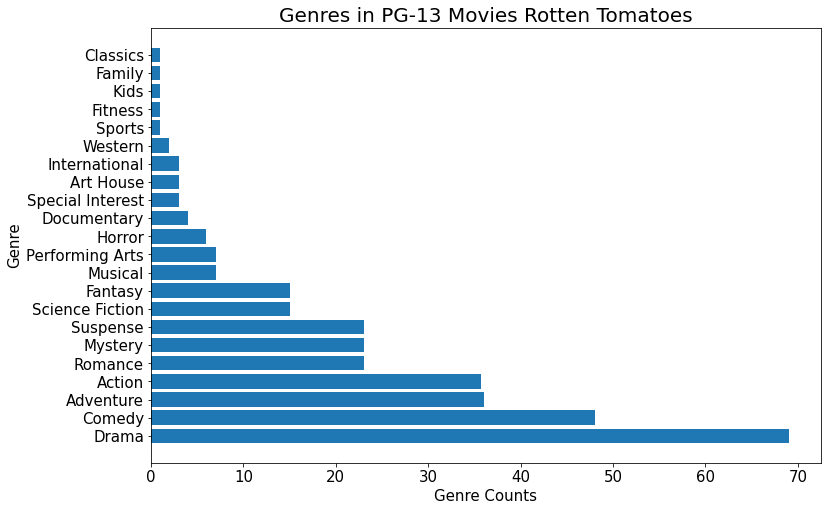

In [333]:
fig, ax = plt.subplots(figsize=(12, 8))
x = list(genre_dict.keys())
height = list(genre_dict.values())

ax.barh(x,height)
ax.set_title('Genres in PG-13 Movies Rotten Tomatoes', fontsize=20)
ax.set_xlabel('Genre Counts', fontsize=15)
ax.set_ylabel('Genre', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

plt.savefig('Genres_PG_13')

That is alot of genres! Let's look at the top 5 to in order to give a better recommendation.

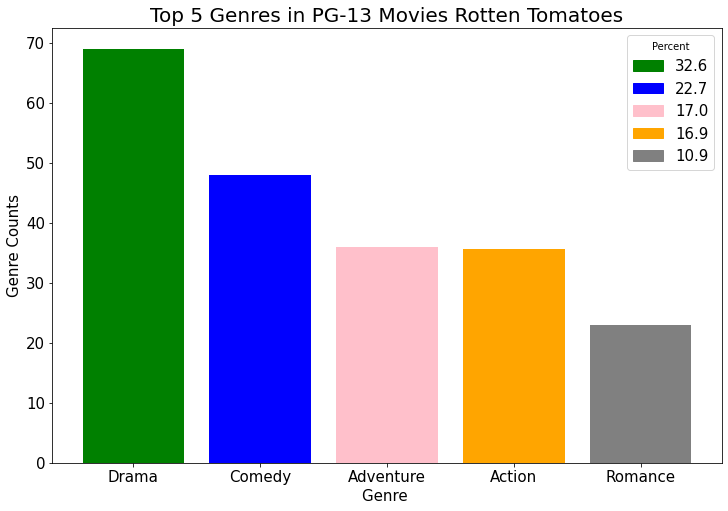

In [334]:
# Create figure to prepare for plot
fig, ax = plt.subplots(figsize=(12, 8))

# Sort Dictionary for better visual and resolve tie between action and adventrue genres
genre_dict['Action'] = float(35.7)
genre_dict = dict(sorted(genre_dict.items(), key=lambda x : x[1],reverse=True))

# Set parameters for our graph
x = list(genre_dict.keys())
height = list(genre_dict.values())
color = ['green','blue','pink','orange', 'grey', 'black']

#Look at top 5 genres represented in dataset
ax.bar(x[:5], height[:5],color=color)

ax.set_title('Top 5 Genres in PG-13 Movies Rotten Tomatoes', fontsize=20)
ax.set_xlabel('Genre ', fontsize=15)
ax.set_ylabel('Genre Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
colors = {round((height[val]/sum(height[:5]))*100,1) : color[val] for val in range(0,len(color[:5]))}        

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent',fontsize=15);

plt.savefig('Top_5_RT')

We see that Drama, Comedy, Adventure, Action and Romance are the most popular genres in PG-13 movies.
Let's see if the genres have a good average profit margin .

## Profit Margin

In [325]:
# Import necessary data to find profit margin
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

With the two data tables, we will merge them using movie title and year the movie was released so that we can have one dataframe with production budget, worldwide gross, and genres variables. There were movies with same title but were not the same movie. So, we also use the year to merge the table as well.

In [326]:
# Create a column for year in movie_budget table
# Since release date is in "month day, year" format, we are going to take only the last four string of the release date and 
# we are going to change the year to float
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(float)

#Combine movie_budget table with title_basics using movie title and released year
profit = movie_budgets.merge(title_basics, how='left', left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])

### Clean Data

The dataframe now needs to be cleaned. We will drop any null values and duplicates from the data table.

In [327]:
# Drop null values
profit.dropna(inplace=True)

In [328]:
# Make a new dataframe with just the columns we need
condensed_profit = profit[['movie', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross']]

# Drop any duplicates
condensed_profit = condensed_profit.drop_duplicates(subset=['movie'])

# Change the columns that are string numbers to float
# First, we remove the , by replace , with ''
# Since the production budget, domestic gross, worldwide gross has a dollar sign in the front,
# we want to take every after the dollar sign and make them into floats
condensed_profit['production_budget'] = condensed_profit['production_budget'].str.replace(',', '').str[1:].astype(float)
condensed_profit['domestic_gross'] = condensed_profit['domestic_gross'].str.replace(',', '').str[1:].astype(float)
condensed_profit['worldwide_gross'] = condensed_profit['worldwide_gross'].str.replace(',', '').str[1:].astype(float)

Now, we will use wordwide_gross and production_budget to find the profit of the movie. We also found the net profit margin because we wanted to make sure that the movie generated enough profit from its sales and whether production budget was being contained.

In [329]:
condensed_profit['profit'] = condensed_profit['worldwide_gross'] - condensed_profit['production_budget']
condensed_profit['net_profit_margin'] = (condensed_profit['profit'] / condensed_profit['worldwide_gross']) * 100
condensed_profit['genres'] = condensed_profit['genres'].str.replace(',', '  ').map(lambda x : x.split(' '))
condensed_profit

,movie,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
1,Pirates of the Caribbean: On Stranger Tides,"[Action, , Adventure, , Fantasy]",410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.733080
2,Dark Phoenix,"[Action, , Adventure, , Sci-Fi]",350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-133.703598
3,Avengers: Age of Ultron,"[Action, , Adventure, , Sci-Fi]",330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
6,Avengers: Infinity War,"[Action, , Adventure, , Sci-Fi]",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
8,Justice League,"[Action, , Adventure, , Fantasy]",300000000.0,229024295.0,6.559452e+08,3.559452e+08,54.264473
...,...,...,...,...,...,...,...
5792,Emily,[Drama],27000.0,3547.0,3.547000e+03,-2.345300e+04,-661.206654
5796,Exeter,"[Horror, , Mystery, , Thriller]",25000.0,0.0,4.897920e+05,4.647920e+05,94.895792
5800,Dutch Kills,"[Crime, , Drama, , Thriller]",25000.0,0.0,0.000000e+00,-2.500000e+04,-inf
5807,The Ridges,"[Drama, , Horror, , Thriller]",17300.0,0.0,0.000000e+00,-1.730000e+04,-inf


With the cleaned data, we want to get the average profit margin for Drama, Comedy, Adventure, and Action genres.

In [330]:
# Make a list of top 4 genres from the Genres in PG-13 Movies bar graph

top4_genre_pg13 = list(genre_dict.keys())[:3]

# Create a new dataframe so that we have data that have profit margin above 0%
condensed_profit_split_genre = condensed_profit[condensed_profit['net_profit_margin'] > 0]


genre_profit_margin = {}

# For each genre in the top 3 genre list, make a list of profit margin for that certain genre
for genre in top4_genre_pg13:
    genre_profit_margin[genre] = []
    for index, row in condensed_profit_split_genre.iterrows():
        if genre in row['genres']:
            genre_profit_margin[genre].append(row['net_profit_margin'])

average_profit_margin_genre = {}

#For each genre, find the average of profit margin

for k,v in genre_profit_margin.items():
    average_profit_margin_genre[k] = sum(v) / float(len(v))
average_profit_margin_genre = dict(sorted(average_profit_margin_genre.items(),key = lambda x:x[1]))


## Visualization

Now, with the data of average profit margin we found above, we created a bar graph to show average profit margin for the top 3 genres in PG-13 movies

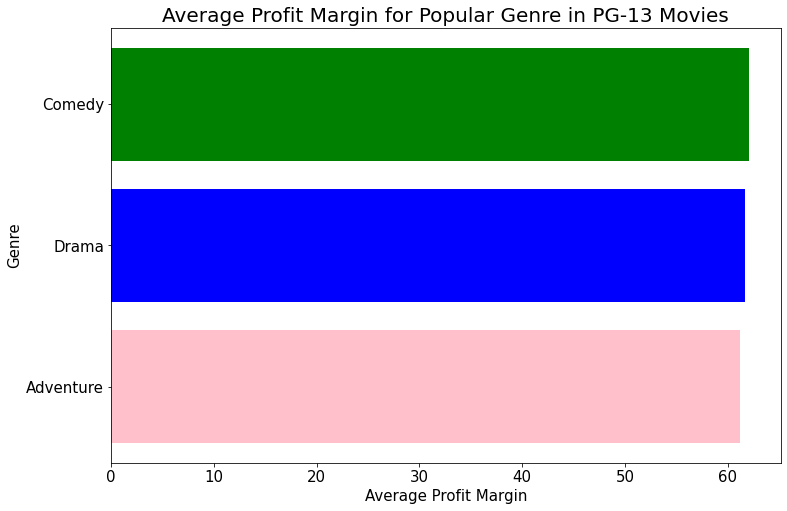

In [336]:
# Make a bar graph with the genre and their average profit margin
average_profit_margin_genre = average_profit_margin_genre = dict(sorted(average_profit_margin_genre.items(),key = lambda x:x[1]))
fig, ax = plt.subplots(figsize=(12, 8))

# Set x to be the genres and set y to be the aaverage profit margins
x = list(average_profit_margin_genre.keys())
height = list(average_profit_margin_genre.values())

ax.barh(x, height, color=['pink','blue','green'])
ax.set_title('Average Profit Margin for Popular Genre in PG-13 Movies', fontsize=20)
ax.set_xlabel('Average Profit Margin', fontsize=15)
ax.set_ylabel('Genre', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('images/average_profit_margin_pg_13_genre.png', bbox_inches = "tight")

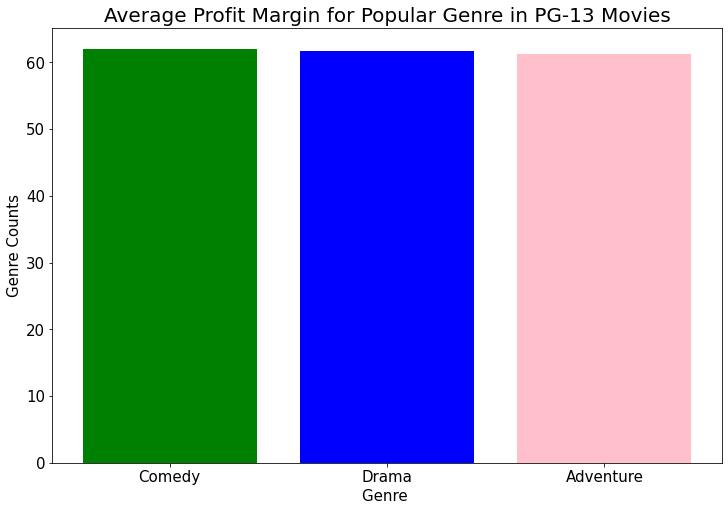

In [335]:
fig, ax = plt.subplots(figsize=(12, 8))
average_profit_margin_genre = average_profit_margin_genre = dict(sorted(average_profit_margin_genre.items(),key = lambda x:x[1],reverse=True))

x = list(average_profit_margin_genre.keys())
height = list(average_profit_margin_genre.values())
ax.bar(x, height,color=color)

ax.set_title('Average Profit Margin for Popular Genre in PG-13 Movies', fontsize=20)
ax.set_xlabel('Genre ', fontsize=15)
ax.set_ylabel('Genre Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
#colors = {round((height[val]/sum(height[:5]))*100,1) : color[val] for val in range(0,len(color[:5]))}        

#labels = list(colors.keys())
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#plt.legend(handles, labels, title='Percent',fontsize=15);
plt.savefig('Avg_Prof_Reg_Barchart')

# Findings and Recommendations

Comedy, Drama and Adventure have the highest average profit margin. They are also in the top 3 represented categories of movies rated PG-13 in the box office dataset. The best genres to focus on will be comedy, drama and adventure. 